### Partie 3: Modele aleatoire

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""

@author: yoffret
"""

'\n\n@author: yoffret\n'

In [5]:
# Importation des bibliothèques nécessaires
import numpy as np  # Pour manipuler les matrices et effectuer des calculs numériques
import networkx as nx  # Pour la création, manipulation et visualisation de graphes
from scipy.sparse.csgraph import connected_components  # Pour identifier les composantes connexes
import matplotlib.pyplot as plt  # Pour visualiser les graphes

In [6]:
# Taille de la matrice d'adjacence (nombre de nœuds dans le graphe)
size = 50

# Probabilité qu'une arête (lien) existe entre deux nœuds
p = 0.05

**Génération d'une matrice d'adjacence aléatoire :**
- `np.random.rand(size, size)` génère une matrice de nombres aléatoires entre 0 et 1.
- `1 * (adj_matrix < p)` remplace les valeurs inférieures à `p` par 1 (arête existante) et les autres par 0 (pas d'arête).

In [7]:
adj_matrix = np.random.rand(size, size)
adj_matrix = 1 * (adj_matrix < p)

Rendre la matrice symétrique pour représenter un graphe non orienté :
- `np.triu(adj_matrix, 1)` conserve uniquement la partie triangulaire supérieure (supprime les duplications).
- `adj_matrix + adj_matrix.T` symétrise la matrice (ajoute la transposée).

In [8]:
adj_matrix = np.triu(adj_matrix, 1)
adj_matrix = adj_matrix + adj_matrix.T

Remarque : Une matrice d'adjacence est une représentation d'un graphe où
les entrées `(i, j)` valent 1 si une arête existe entre les nœuds `i` et `j`,
et 0 sinon.

**Exemple de matrice d'adjacence prédéfinie (optionnel) :**
Si vous voulez utiliser une matrice fixe au lieu de générer aléatoirement :


In [10]:
adj_matrix = np.array([
    [0, 1, 0, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 0]
])

**Création du graphe avec NetworkX :**
- La fonction `nx.from_numpy_array` crée un graphe à partir d'une matrice d'adjacence.

In [11]:
graph = nx.from_numpy_array(adj_matrix)

**Renommer les nœuds pour qu'ils commencent à 1 au lieu de 0 :**
- Les nœuds de NetworkX commencent par défaut à 0. On les renomme avec un décalage de +1.

In [13]:
mapping = {i: i + 1 for i in graph.nodes}
graph = nx.relabel_nodes(graph, mapping)

**Disposition des nœuds pour la visualisation :**
- `nx.spring_layout` calcule la position des nœuds selon un modèle de "forces de ressort".
- `k` contrôle la distance moyenne entre les nœuds (plus petit rapproche les nœuds).
- `seed` fixe l'aléa pour des résultats reproductibles.

In [14]:
pos = nx.spring_layout(graph, k=1.0, seed=42)

# **Visualisation du graphe :**

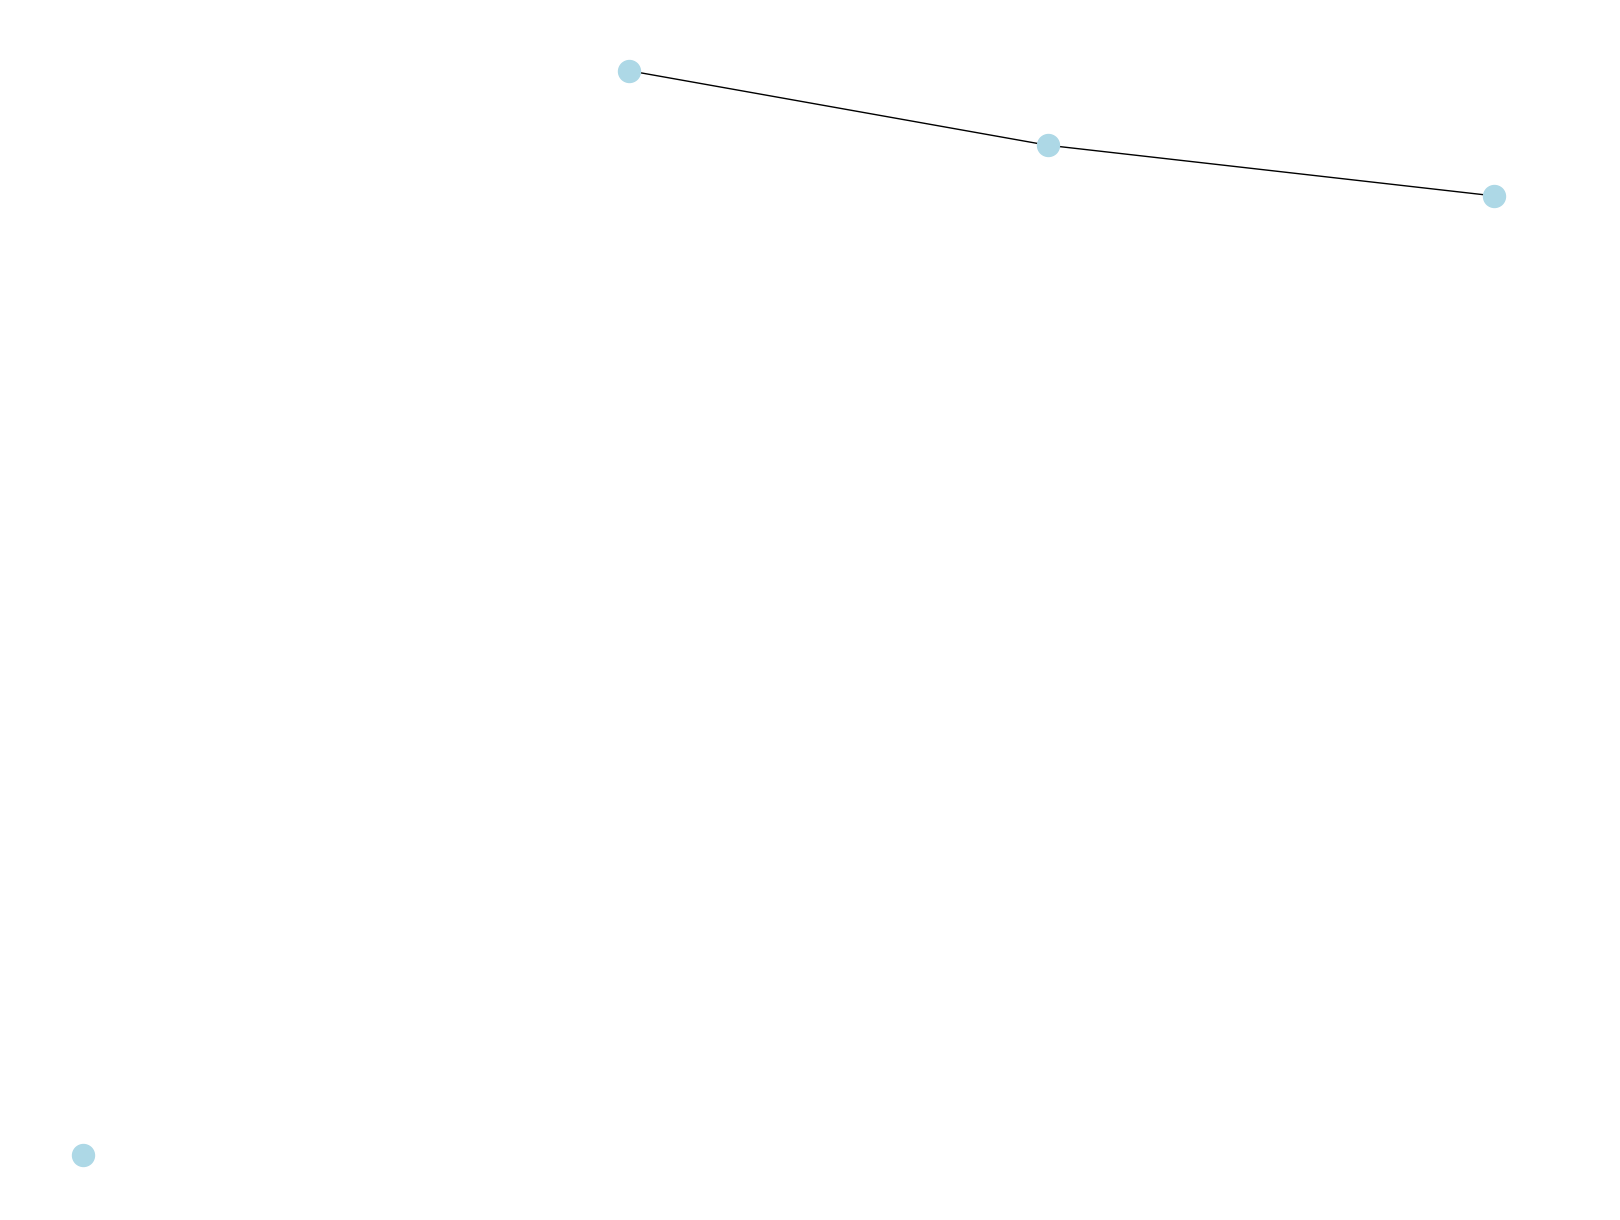

In [21]:
plt.figure(figsize=(16, 12))  # Taille de la figure
nx.draw(
    graph,
    with_labels=False,  # Désactiver l'affichage des étiquettes
    node_color="lightblue",  # Couleur des nœuds
    node_size=250,  # Taille des nœuds
    edge_color="black",  # Couleur des arêtes
    font_size=18  # Taille de la police pour les étiquettes (si activées)
)
plt.show()

**Affichage de la matrice d'adjacence :**
Ceci permet de vérifier les connexions entre les nœuds sous forme de matrice.


In [16]:
print(adj_matrix)

[[0 1 0 0]
 [1 0 1 0]
 [0 1 0 0]
 [0 0 0 0]]


**Identification des composantes connexes :**
- `connected_components` calcule :
- `n_components` : Le nombre total de composantes connexes.
- `labels` : Un tableau où chaque nœud est associé à une étiquette de composante connexe.

In [17]:
n_components, labels = connected_components(csgraph=adj_matrix, directed=False)

**Affichage du nombre de composantes connexes :**
Ce résultat indique combien de sous-graphes disjoints existent dans le graphe.

In [18]:
print(n_components)

2


**Fonction pour vérifier si deux nœuds appartiennent à la même composante connexe :**
- Recalcule les étiquettes des composantes connexes.
- Compare les étiquettes des deux nœuds.
- Les indices des nœuds sont décalés de -1 car la numérotation des nœuds commence à 1 dans ce script.

In [19]:
def are_in_same_component_from_matrix(adj_matrix, node1, node2):
    _, labels = connected_components(csgraph=adj_matrix, directed=False)
    return labels[node1 - 1] == labels[node2 - 1]


True
False


**Tests :**
- Vérifie si deux paires de nœuds sont connectées directement ou indirectement via d'autres nœuds.

In [20]:
print(are_in_same_component_from_matrix(adj_matrix, 1, 2))  # True ou False selon les connexions
print(are_in_same_component_from_matrix(adj_matrix, 1, 4))  # True ou False selon les connexions

True
False
